# Rice Yield Prediction

In this study, we will try to predict rice yield with machine learning algorithms.

# Content

1. [Python Libraries](#1)
2. [Load and Review Data](#2)
3. [Feature Extraction and EDA](#3)
4. [Feature Selection](#4)
5. [Data Preprocessing](#5)
6. [Model Build](#6)

<a id="1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-rice-production-statistics-dataset/rice_production_by_country.csv


<a id="2"></a>
## Load and Review Data

In [2]:
data = pd.read_csv("/kaggle/input/global-rice-production-statistics-dataset/rice_production_by_country.csv")
data.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield
0,Chile,174.9K,65.0,10.0,76,26.2K,77.0,"6,664.8",16.0
1,Mauritania,383.0K,50.0,96.1,26,73.0K,63.0,"5,249.2",36.0
2,Turkey,1.0M,40.0,12.4,68,126.4K,52.0,"7,910.2",7.0
3,Kyrgyzstan,41.2K,87.0,6.5,81,11.3K,89.0,"3,646.4",63.0
4,Laos,3.4M,21.0,493.9,3,783.8K,23.0,"4,386.5",49.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    object 
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    object 
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    object 
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    object 
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.5+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank of Rice Production,118.0,59.5,34.207699,1.0,30.25,59.5,88.75,118.0
Rank of Rice Production Per Person,119.0,60.0,34.496377,1.0,30.50,60.0,89.50,119.0
Rank of Rice Acreage,118.0,59.5,34.207699,1.0,30.25,59.5,88.75,118.0
Rank of Rice Yield,118.0,59.5,34.207699,1.0,30.25,59.5,88.75,118.0


In [5]:
data.describe(include="object")

,Country,Rice Production (Tons),Rice Production Per Person (Kg),Rice Acreage (Hectare),Rice Yield (Kg / Hectare)
count,119,119,119,119,119
unique,119,109,109,114,119
top,Chile,1.1M,0.10,1.5M,"6,664.8"
freq,1,5,3,2,1


* There is a single observation for each country.
* We need to update the data types numerically.

In [6]:
def data_edit(data,col):
    for i in data.index.to_list():
        if "K" in data.loc[i,col]:
            data.loc[i,col]=float(data.loc[i,col].split("K")[0])
        elif "M" in data.loc[i,col]:
            data.loc[i,col]=float(data.loc[i,col].split("M")[0])
        else:
            continue
    return data 

In [7]:
data=data_edit(data,"Rice Acreage (Hectare)")
data=data_edit(data,"Rice Production (Tons)")

In [8]:
data.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield
0,Chile,174.9,65.0,10.0,76,26.2,77.0,"6,664.8",16.0
1,Mauritania,383.0,50.0,96.1,26,73.0,63.0,"5,249.2",36.0
2,Turkey,1.0,40.0,12.4,68,126.4,52.0,"7,910.2",7.0
3,Kyrgyzstan,41.2,87.0,6.5,81,11.3,89.0,"3,646.4",63.0
4,Laos,3.4,21.0,493.9,3,783.8,23.0,"4,386.5",49.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    object 
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    object 
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    object 
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    object 
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.5+ KB


In [10]:
data["Rice Production (Tons)"]=data["Rice Production (Tons)"].astype(float)
data["Rice Acreage (Hectare)"]=data["Rice Acreage (Hectare)"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    float64
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    object 
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    float64
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    object 
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 8.5+ KB


In [11]:
def data_edit2(data,col):
    for i in data.index.to_list():
        if "," in data.loc[i,col]:
            data.loc[i,col]=data.loc[i,col].split(",")[0] + data.loc[i,col].split(",")[1]
        else:
            continue
    data[col]=data[col].astype(float)
    return data

In [12]:
data=data_edit2(data,"Rice Yield (Kg / Hectare)")
data=data_edit2(data,"Rice Production Per Person (Kg)")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    float64
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    float64
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    float64
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    float64
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 8.5+ KB


In [13]:
# check null values
data.isnull().sum()[data.isnull().sum()>0]

Rank of Rice Production    1
Rank of Rice Acreage       1
Rank of Rice Yield         1
dtype: int64

The number of missing observations is small. Let's remove these from the data set.

In [14]:
print("Before drop na",data.shape)
data.dropna(axis=0,inplace=True)
print("After drop na",data.shape)

Before drop na (119, 9)
After drop na (118, 9)


<a id="3"></a>
## Feature Extraction and EDA

In this section, we will create new variables using existing variables.

In [15]:
data["Total Population"]=data["Rice Production (Tons)"]/(data["Rice Production Per Person (Kg)"]/1000)
data["Acreage Per Capita"]=data["Rice Acreage (Hectare)"]/data["Total Population"]
data["Rice Yield Per Capita"]=(data["Rice Yield (Kg / Hectare)"]*data["Rice Acreage (Hectare)"])/data["Total Population"]
data["Normalized Production Rank"]=(data["Rank of Rice Production"]+data["Rank of Rice Production Per Person"])/2
data["Acreage Efficiency"]=data["Rice Production (Tons)"]/data["Rice Acreage (Hectare)"]
data["Yield Efficiency Score"]=(data["Rank of Rice Yield"]+data["Rank of Rice Acreage"])/2

data.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield,Total Population,Acreage Per Capita,Rice Yield Per Capita,Normalized Production Rank,Acreage Efficiency,Yield Efficiency Score
0,Chile,174.9,65.0,10.0,76,26.2,77.0,6664.8,16.0,17490.000000,0.001498,9.983863,70.5,6.675573,46.5
1,Mauritania,383.0,50.0,96.1,26,73.0,63.0,5249.2,36.0,3985.431842,0.018317,96.148075,38.0,5.246575,49.5
2,Turkey,1.0,40.0,12.4,68,126.4,52.0,7910.2,7.0,80.645161,1.567360,12398.131072,54.0,0.007911,29.5
3,Kyrgyzstan,41.2,87.0,6.5,81,11.3,89.0,3646.4,63.0,6338.461538,0.001783,6.500682,84.0,3.646018,76.0
4,Laos,3.4,21.0,493.9,3,783.8,23.0,4386.5,49.0,6.883985,113.858476,499440.207038,12.0,0.004338,36.0


In [16]:
# check unique values

for i in data.columns.to_list():
    print("{} total unique value: {}".format(i,len(data[i].unique())))

Country total unique value: 118
Rice Production (Tons) total unique value: 99
Rank of Rice Production total unique value: 118
Rice Production Per Person (Kg) total unique value: 108
Rank of Rice Production Per Person total unique value: 118
Rice Acreage (Hectare) total unique value: 107
Rank of Rice Acreage total unique value: 118
Rice Yield (Kg / Hectare) total unique value: 118
Rank of Rice Yield total unique value: 118
Total Population total unique value: 117
Acreage Per Capita total unique value: 118
Rice Yield Per Capita total unique value: 117
Normalized Production Rank total unique value: 94
Acreage Efficiency total unique value: 116
Yield Efficiency Score total unique value: 86


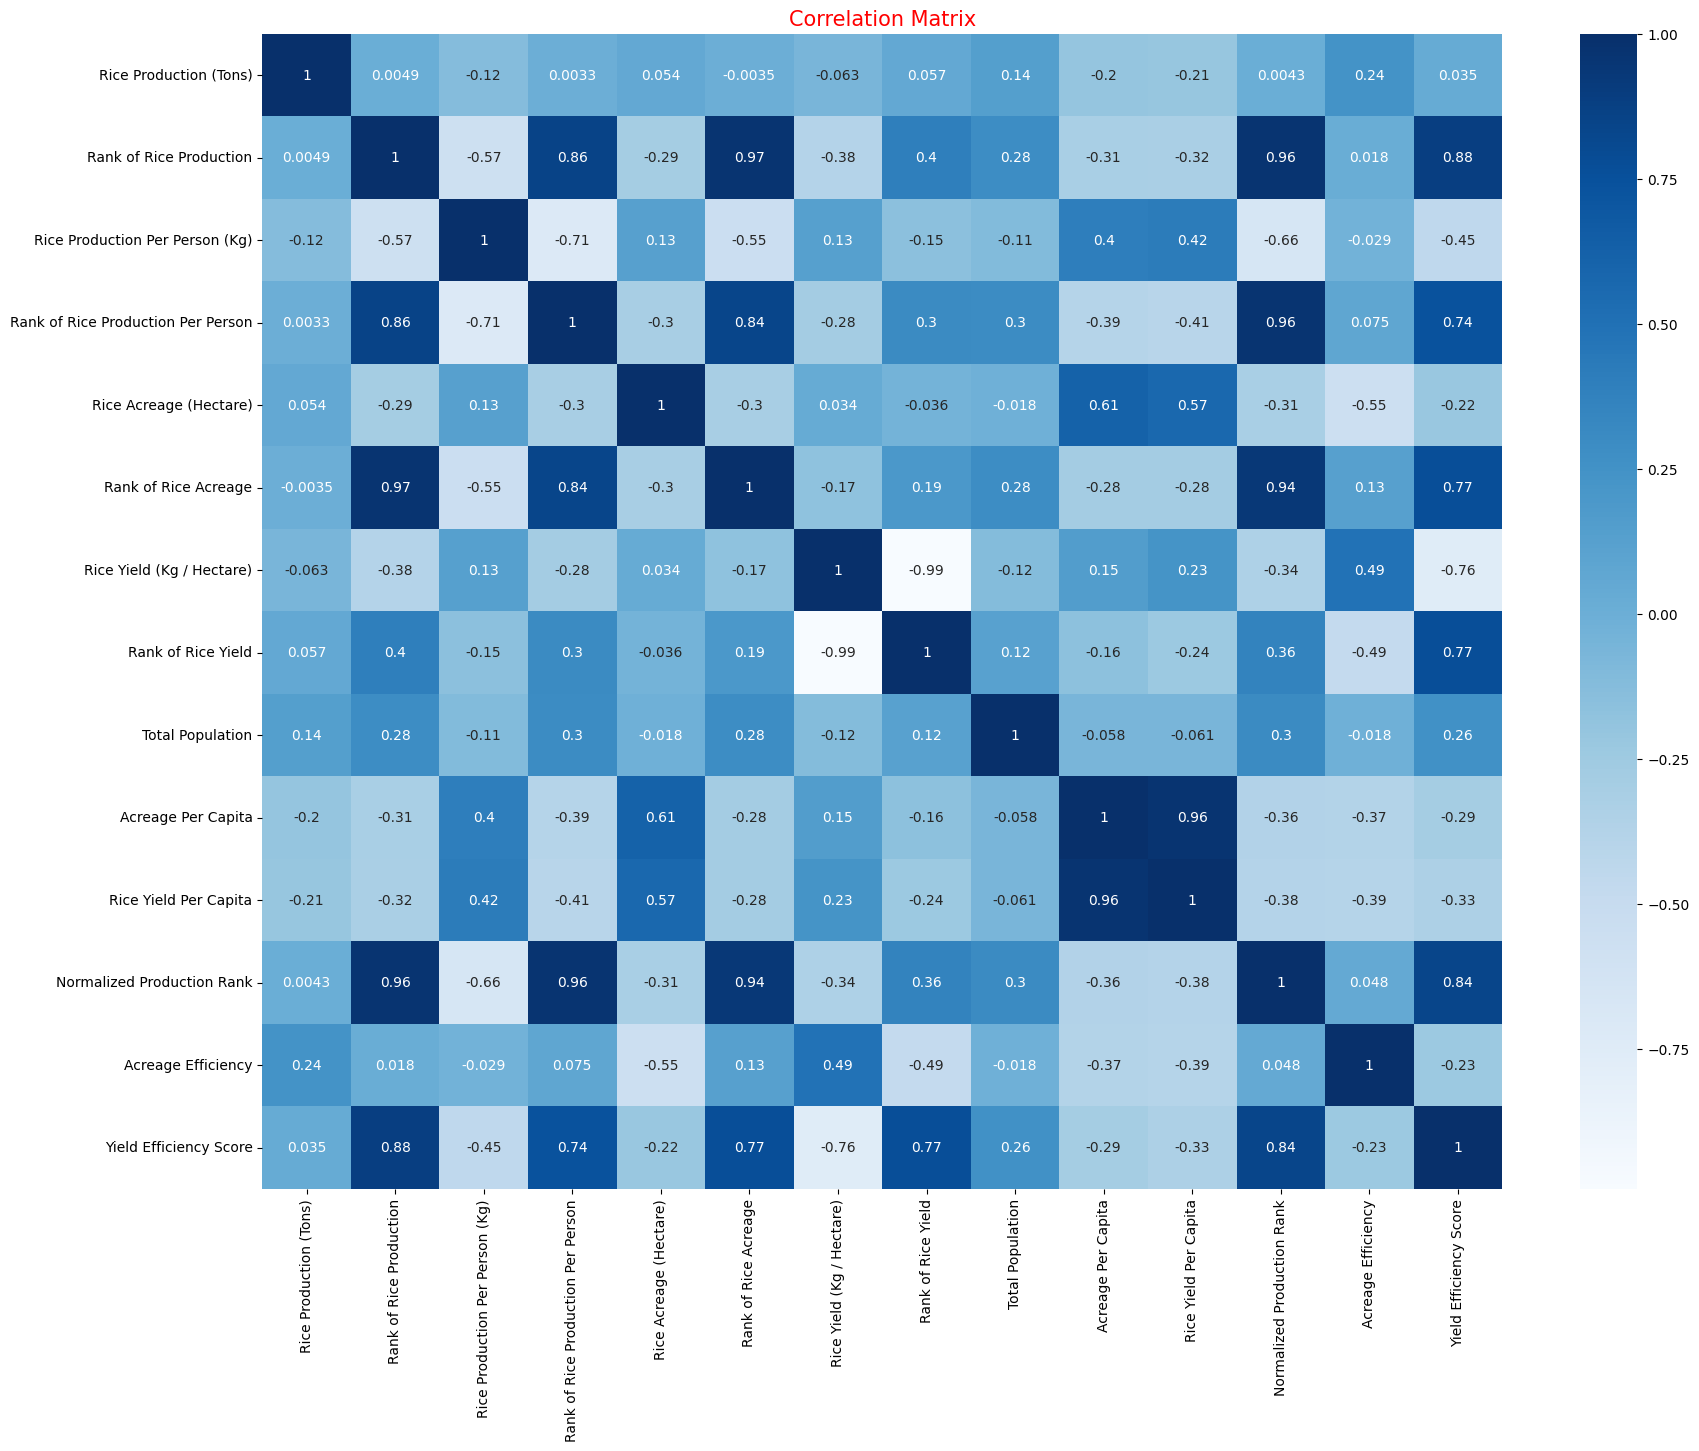

In [17]:
# Correlation Analysis

num_cols=data.select_dtypes(include=["float","int"]).columns
corr_data=data[num_cols].corr()
plt.figure(figsize=(20,15))
plt.title("Correlation Matrix",color="red",fontsize=15)
sns.heatmap(corr_data, annot=True, cmap="Blues")
sns.set(font_scale=2, style="white")
plt.show()

* There are independent variables that are highly correlated with each other. 
* These variables may cause multicollinearity problems when used together in the model. We will cover this issue in the feature selection section.

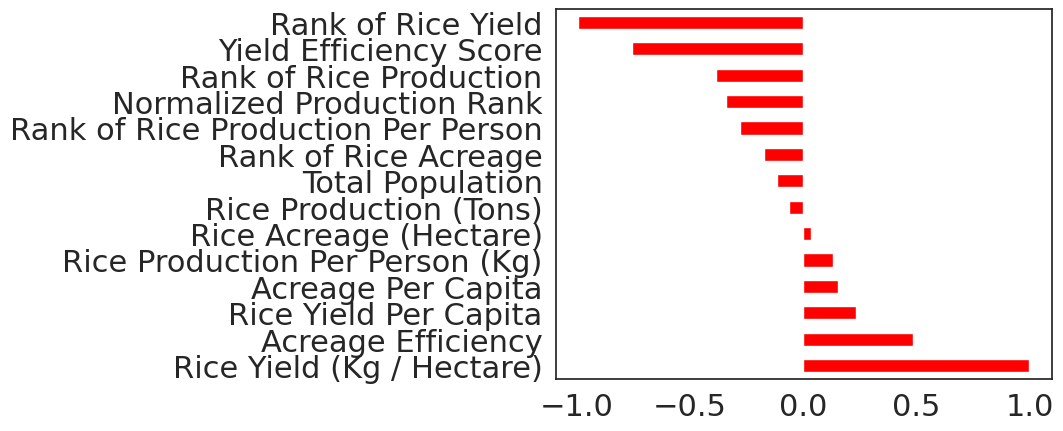

In [18]:
# Effect on dependent variable
cor=corr_data["Rice Yield (Kg / Hectare)"].sort_values(ascending=False)
cor.plot(kind="barh",color="red")
plt.show()

In [19]:
# Encoding for categorical variable
def label_encoding(df):
    categorical_columns=df.select_dtypes(include="object").columns
    label_encoder=LabelEncoder()
    df[categorical_columns]=df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
    
label_encoding(data)
data.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield,Total Population,Acreage Per Capita,Rice Yield Per Capita,Normalized Production Rank,Acreage Efficiency,Yield Efficiency Score
0,21,174.9,65.0,10.0,76,26.2,77.0,6664.8,16.0,17490.000000,0.001498,9.983863,70.5,6.675573,46.5
1,63,383.0,50.0,96.1,26,73.0,63.0,5249.2,36.0,3985.431842,0.018317,96.148075,38.0,5.246575,49.5
2,107,1.0,40.0,12.4,68,126.4,52.0,7910.2,7.0,80.645161,1.567360,12398.131072,54.0,0.007911,29.5
3,56,41.2,87.0,6.5,81,11.3,89.0,3646.4,63.0,6338.461538,0.001783,6.500682,84.0,3.646018,76.0
4,57,3.4,21.0,493.9,3,783.8,23.0,4386.5,49.0,6.883985,113.858476,499440.207038,12.0,0.004338,36.0


<a id="4"></a>
## Feature Selection

We will use the f regression filtering method in feature selection. F regression filtering statistically calculates the effect of each independent variable on the dependent variable and performs a rating based on the F statistic score.

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

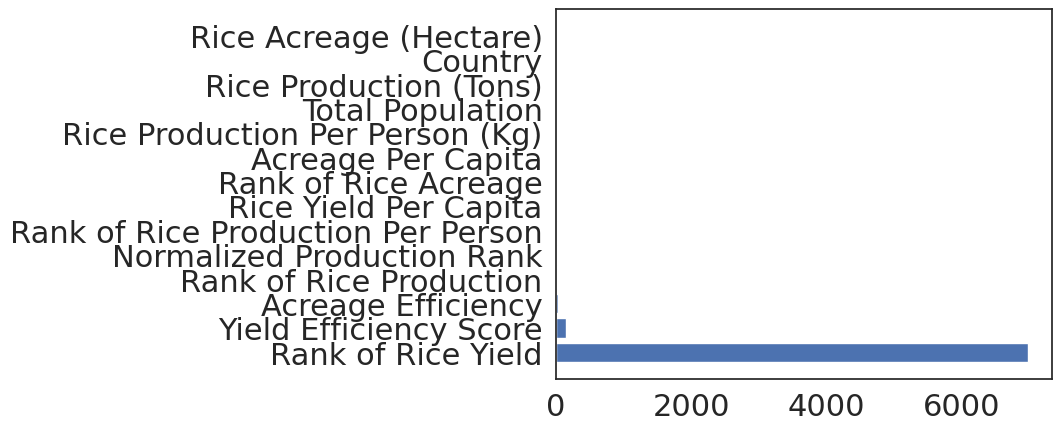

In [21]:
x=data.drop("Rice Yield (Kg / Hectare)",axis=1)
y=data["Rice Yield (Kg / Hectare)"]

f_selector=SelectKBest(score_func=f_regression,k="all")
f_selector.fit_transform(x,y)

df=pd.DataFrame()
df["features_name"]=x.columns.to_list()
df["f_selector_scores"]=f_selector.scores_
df=df.sort_values(by="f_selector_scores",ascending=False)

plt.barh(df["features_name"], df["f_selector_scores"])
plt.show()

In [22]:
df

,features_name,f_selector_scores
7,Rank of Rice Yield,6980.252546
13,Yield Efficiency Score,154.223556
12,Acreage Efficiency,36.040136
2,Rank of Rice Production,19.952051
11,Normalized Production Rank,15.405510
4,Rank of Rice Production Per Person,9.617886
10,Rice Yield Per Capita,6.774925
6,Rank of Rice Acreage,3.628612
9,Acreage Per Capita,2.834687
3,Rice Production Per Person (Kg),2.004979


* Selected variables:

In [23]:
df[df["f_selector_scores"]>2]["features_name"].to_list()

['Rank of Rice Yield',
 'Yield Efficiency Score',
 'Acreage Efficiency',
 'Rank of Rice Production',
 'Normalized Production Rank',
 'Rank of Rice Production Per Person',
 'Rice Yield Per Capita',
 'Rank of Rice Acreage',
 'Acreage Per Capita',
 'Rice Production Per Person (Kg)']

In [24]:
x=data[df[df["f_selector_scores"]>2]["features_name"].to_list()]
y=data["Rice Yield (Kg / Hectare)"]

<a id="5"></a>
## Data Preprocessing

* We will first look at the distribution of the dependent variable. If it does not show a normal distribution, we will apply logarithmic transformation and ensure that it converges to the normal distribution.
* Then we will create training and testing datasets and standardize.

In [25]:
from scipy import stats
from scipy.stats import norm, skew

/tmp/ipykernel_18/16696813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, fit=norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


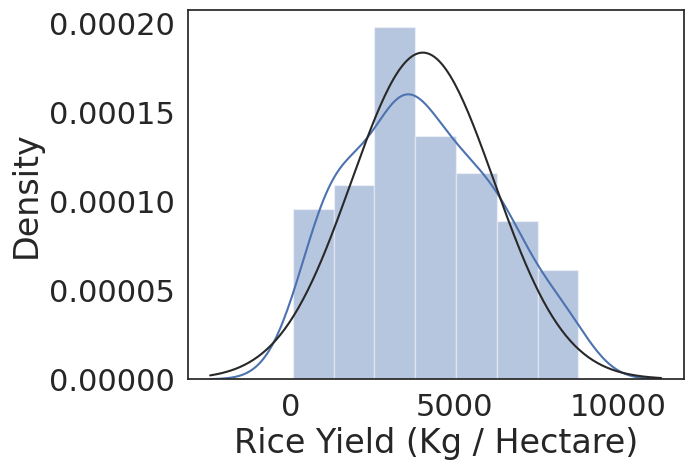

In [26]:
sns.distplot(y, fit=norm)
plt.show()

In [27]:
(mu,sigma)=norm.fit(y)
print("mu: {}, sigma: {}".format(mu,sigma))

mu: 4023.3949152542373, sigma: 2176.911374325804


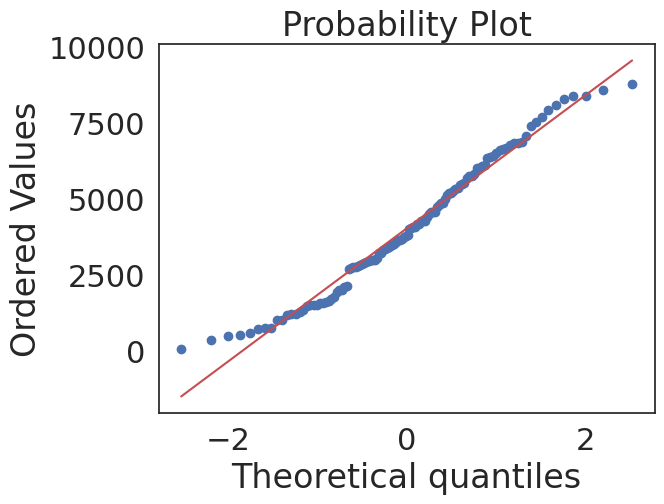

In [28]:
## qq plot:
plt.figure()
stats.probplot(y, plot=plt)
plt.show()

We observe that the normal distribution situation is disrupted in the extreme regions.

/tmp/ipykernel_18/2840980043.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log, fit=norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


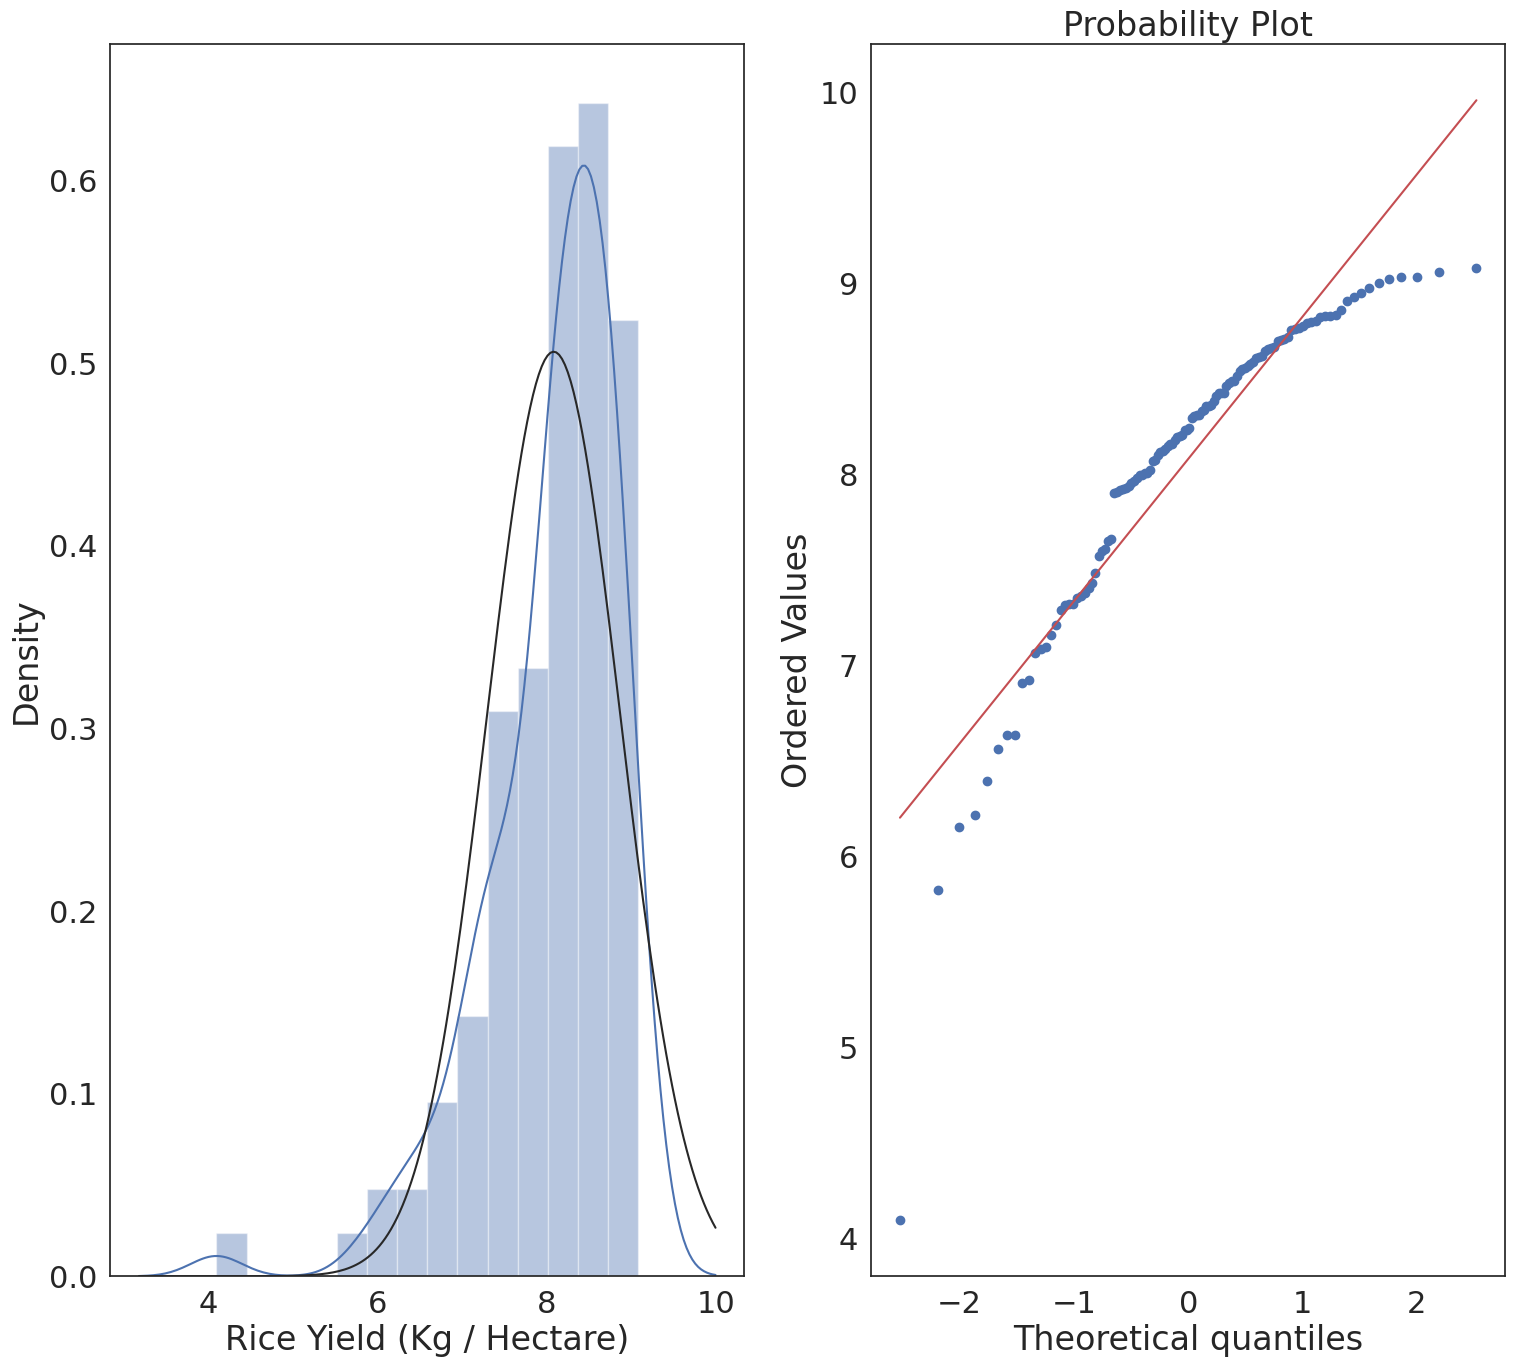

In [29]:
y_log=np.log(y)

plt.figure(figsize=(18,16))
plt.subplot(1,2,1)
sns.distplot(y_log, fit=norm)
plt.subplot(1,2,2)
stats.probplot(y_log, plot=plt)
plt.show()

The distribution is broken. We will use the original dependent variable values in the model phase.

In [30]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [31]:
# train - test split

X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(94, 10)
(94,)
(24, 10)
(24,)


In [32]:
# Standardization

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="6"></a>
## Model Build

In [33]:
from sklearn.model_selection import cross_validate, GridSearchCV, StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [34]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state = 0)
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state = 0)
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state = 0)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state = 0)
    },
    'XGBRegressor':
    {
        'model':XGBRegressor()
    }
}

In [35]:
for name,model in models.items():
    cv_results = cross_validate(model["model"], x_sc, y, cv=5, scoring=['r2', 'neg_mean_squared_error'])
    print("############# {} ##############".format(name))
    print("R_score: {}".format(round(cv_results["test_r2"].mean(),2)))
    print("RMSE: {}".format(round(cv_results["test_neg_mean_squared_error"].mean(),2)))

############# Lasso ##############
R_score: 0.98
RMSE: -94445.17
############# LinearRegression ##############
R_score: 0.98
RMSE: -93262.31
############# Ridge ##############
R_score: 0.98
RMSE: -93854.36
############# ElasticNet ##############
R_score: 0.88
RMSE: -507243.99
############# KNeighborsRegressor ##############
R_score: 0.87
RMSE: -546004.47
############# RandomForestRegressor ##############
R_score: 1.0
RMSE: -18273.17
############# GradientBoostingRegressor ##############
R_score: 1.0
RMSE: -13368.74
############# AdaBoostRegressor ##############
R_score: 0.99
RMSE: -26751.94
############# DecisionTreeRegressor ##############
R_score: 0.99
RMSE: -53554.66
############# XGBRegressor ##############
R_score: 1.0
RMSE: -21662.67


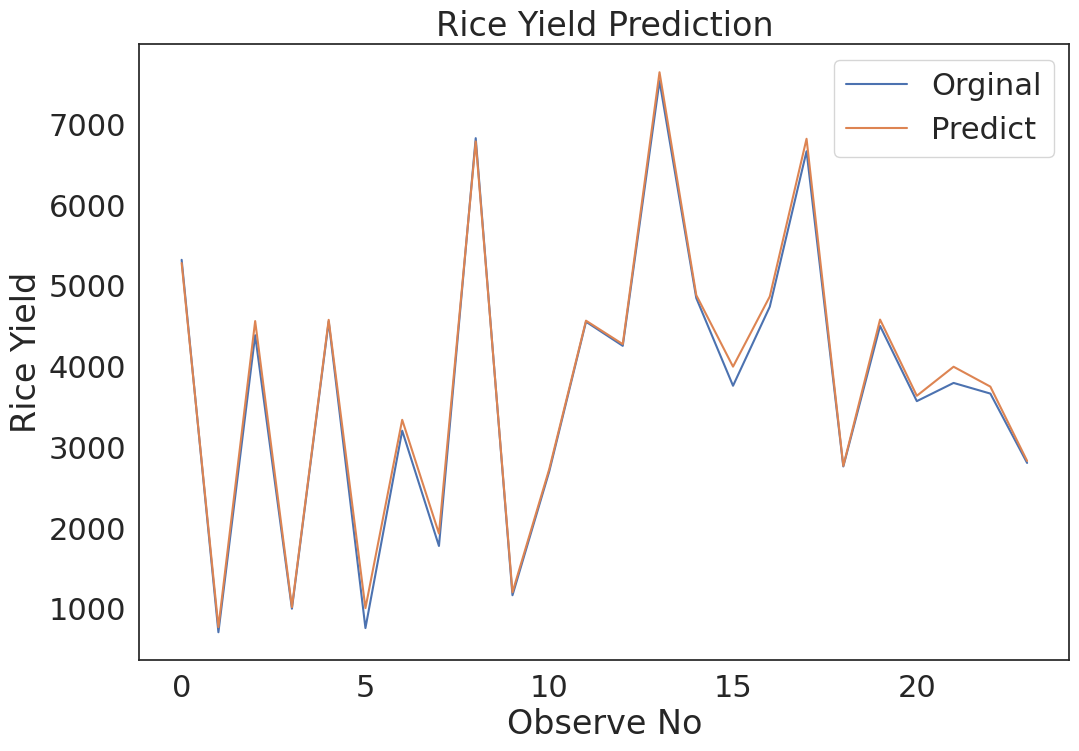

In [36]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

plt.figure(figsize=(12,8))
plt.plot(range(len(y_test[:50])),y_test[:50],label="Orginal")
plt.plot(range(len(y_test[:50])),y_pred[:50],label="Predict")
plt.title("Rice Yield Prediction")
plt.ylabel("Rice Yield")
plt.xlabel("Observe No")
plt.legend()
plt.show()